<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-deep-learning/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving caries-59-_png_tooth_1.png to caries-59-_png_tooth_1.png

image 1/1 /content/caries-59-_png_tooth_1.png: 640x640 caries_superficial 0.88, caries_media 0.10, noncaries 0.02, caries_profunda 0.00, 107.6ms
Speed: 46.4ms preprocess, 107.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


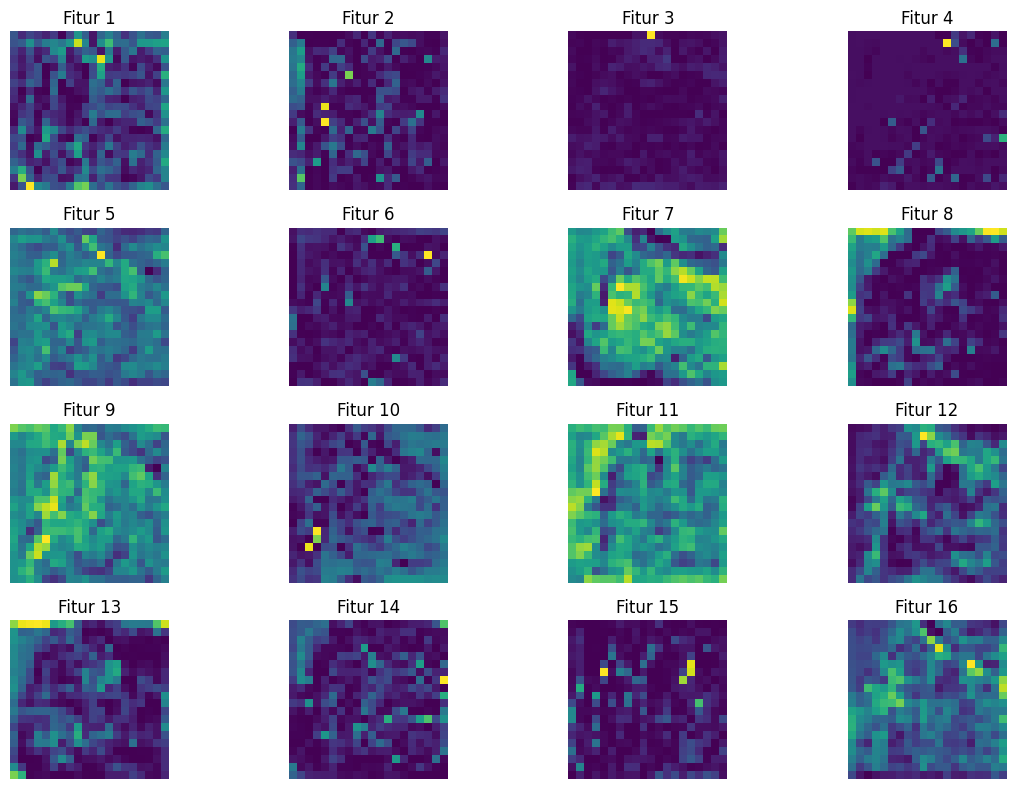

In [3]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import torchvision.transforms as transforms

# Load model
model = YOLO('/content/classification.pt')

# Pilih gambar untuk analisis
from google.colab import files
uploaded = files.upload()
img_path = next(iter(uploaded))

# Load gambar
image = Image.open(img_path).convert("RGB")
image_resized = image.resize((224, 224))
transform = transforms.ToTensor()
input_tensor = transform(image_resized).unsqueeze(0)

# Register hook untuk ambil fitur dari layer tertentu
features = []
def hook_fn(module, input, output):
    features.append(output)

# Pilih layer backbone terakhir
target_layer = model.model.model[-3]  # biasanya Conv terakhir sebelum classifier
hook = target_layer.register_forward_hook(hook_fn)

# Forward pass
_ = model.predict(img_path, save=False)

# Visualisasi fitur
feature_map = features[0].squeeze().detach().cpu().numpy()
num_features = min(feature_map.shape[0], 16)  # tampilkan 16 fitur saja

plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(4, 4, i + 1)
    plt.imshow(feature_map[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Fitur {i+1}")
plt.tight_layout()
plt.show()

hook.remove()  # bersihkan hook

In [6]:
import zipfile
import os

# Pastikan file bernama sesuai
zip_path = "/content/test_feature.zip"
extract_path = "/content/test"

# Buat folder tujuan jika belum ada
os.makedirs(extract_path, exist_ok=True)

# Ekstrak zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"File berhasil diekstrak ke {extract_path}")

File berhasil diekstrak ke /content/test


In [10]:
import glob

for class_name in class_names:
    files = glob.glob(f"/content/test/test_feature/{class_name}/*.jpg")
    print(f"{class_name}: {len(files)} file(s)")

noncaries: 1010 file(s)
caries_media: 165 file(s)
caries_profunda: 106 file(s)
caries_superficial: 143 file(s)


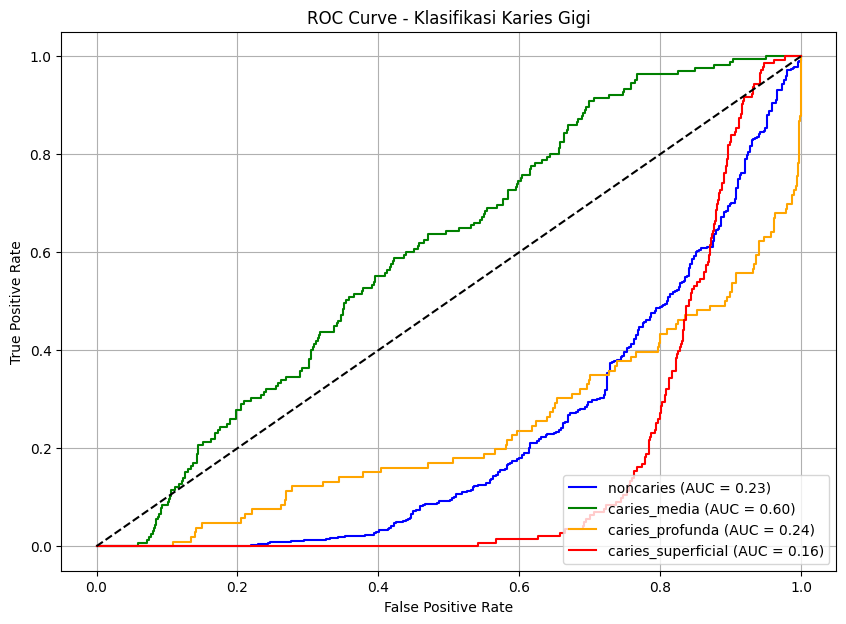

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# Misal kita punya data uji dalam folder: /content/test/class_name/image.jpg
import glob

class_names = ['noncaries', 'caries_media', 'caries_profunda', 'caries_superficial']
num_classes = len(class_names)

y_true = []
y_score = []

for idx, class_name in enumerate(class_names):
    image_paths = glob.glob(f"/content/test/test_feature/{class_name}/*.jpg")
    for path in image_paths:
        result = model(path, verbose=False)[0]
        probs = result.probs.data.cpu().numpy()

        y_score.append(probs)
        y_true.append(idx)

# Binarisasi label
y_true_bin = label_binarize(y_true, classes=range(num_classes))
y_score = np.array(y_score)

# Plot ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Klasifikasi Karies Gigi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

-------------


image 1/1 /content/caries-59-_png_tooth_1.png: 640x640 caries_media 0.97, noncaries 0.03, caries_superficial 0.00, caries_profunda 0.00, 93.8ms
Speed: 14.8ms preprocess, 93.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


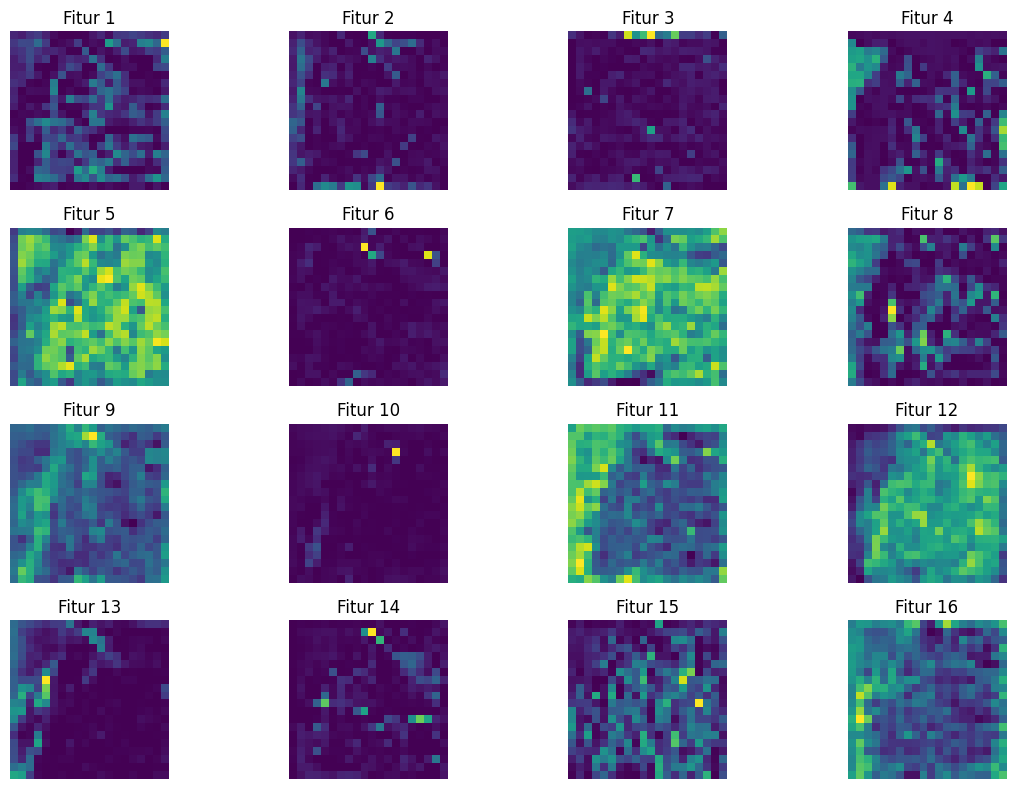

In [12]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import torchvision.transforms as transforms

# Load model
model = YOLO('/content/classification2.pt')

# Pilih gambar untuk analisis
img_path = ('/content/caries-59-_png_tooth_1.png')

# Load gambar
image = Image.open(img_path).convert("RGB")
image_resized = image.resize((224, 224))
transform = transforms.ToTensor()
input_tensor = transform(image_resized).unsqueeze(0)

# Register hook untuk ambil fitur dari layer tertentu
features = []
def hook_fn(module, input, output):
    features.append(output)

# Pilih layer backbone terakhir
target_layer = model.model.model[-3]  # biasanya Conv terakhir sebelum classifier
hook = target_layer.register_forward_hook(hook_fn)

# Forward pass
_ = model.predict(img_path, save=False)

# Visualisasi fitur
feature_map = features[0].squeeze().detach().cpu().numpy()
num_features = min(feature_map.shape[0], 16)  # tampilkan 16 fitur saja

plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(4, 4, i + 1)
    plt.imshow(feature_map[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Fitur {i+1}")
plt.tight_layout()
plt.show()

hook.remove()  # bersihkan hook

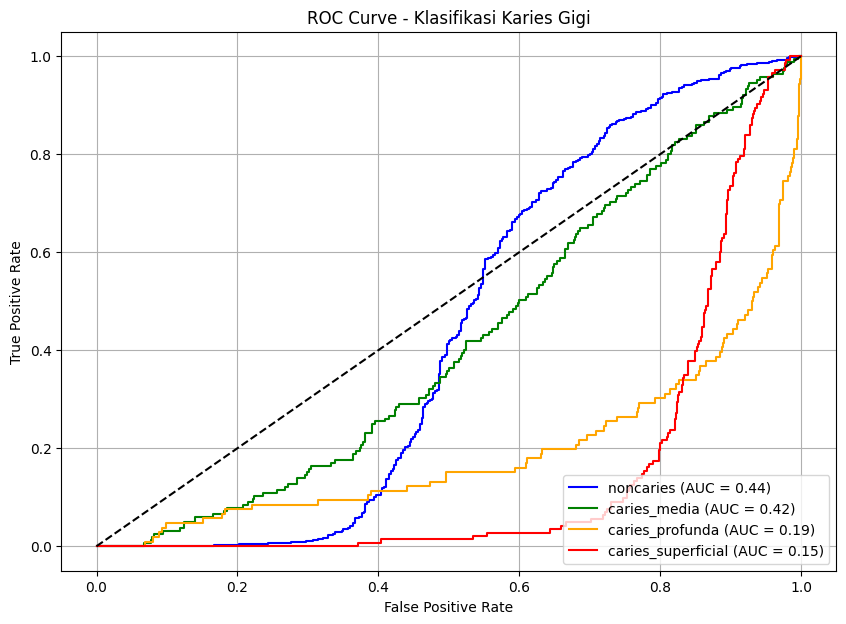

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# Misal kita punya data uji dalam folder: /content/test/class_name/image.jpg
import glob

class_names = ['noncaries', 'caries_media', 'caries_profunda', 'caries_superficial']
num_classes = len(class_names)

y_true = []
y_score = []

for idx, class_name in enumerate(class_names):
    image_paths = glob.glob(f"/content/test/test_feature/{class_name}/*.jpg")
    for path in image_paths:
        result = model(path, verbose=False)[0]
        probs = result.probs.data.cpu().numpy()

        y_score.append(probs)
        y_true.append(idx)

# Binarisasi label
y_true_bin = label_binarize(y_true, classes=range(num_classes))
y_score = np.array(y_score)

# Plot ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Klasifikasi Karies Gigi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()